In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import warnings        
warnings.filterwarnings("ignore") 
plt.style.use('ggplot') 
from scipy.stats import norm

In [2]:
df = pd.read_csv('Gia SMP va SMPcap 2021.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
 4   4       365 non-null    float64
 5   5       365 non-null    float64
 6   6       365 non-null    float64
 7   7       365 non-null    float64
 8   8       365 non-null    float64
 9   9       365 non-null    float64
 10  10      365 non-null    float64
 11  11      365 non-null    float64
 12  12      365 non-null    float64
 13  13      365 non-null    float64
 14  14      365 non-null    float64
 15  15      365 non-null    float64
 16  16      365 non-null    float64
 17  17      365 non-null    float64
 18  18      365 non-null    float64
 19  19      365 non-null    float64
 20  20      365 non-null    float64
 21  21      365 non-null    float64
 22  22

In [4]:
df.isna().mean()

Ngày    0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
dtype: float64

In [5]:
df = df.loc[:,["Ngày","12","13"]]
df.head()

,Ngày,12,13
0,1/1/2021,964.4,964.4
1,1/2/2021,1019.7,1019.7
2,1/3/2021,988.4,988.4
3,1/4/2021,1010.8,1010.8
4,1/5/2021,1061.5,1061.5


In [6]:
df.dtypes

Ngày     object
12      float64
13      float64
dtype: object

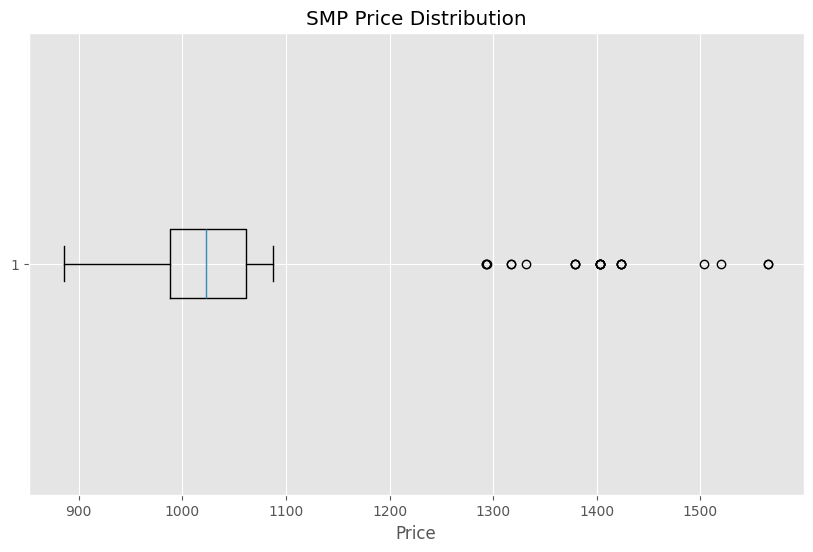

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['12'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [8]:
IQR_Price = df["12"].quantile(0.75) - df["12"].quantile(0.25)
lower_Price_limit = df["12"].quantile(0.25) - (IQR_Price * 1.5)
upper_Price_limit = df["12"].quantile(0.75) + (IQR_Price * 1.5)
print(lower_Price_limit)
print(upper_Price_limit)
df["12"]= np.where(df["12"] > upper_Price_limit , upper_Price_limit ,#cau
                      np.where(df["12"] < lower_Price_limit , lower_Price_limit , df["12"]))

878.75
1171.15


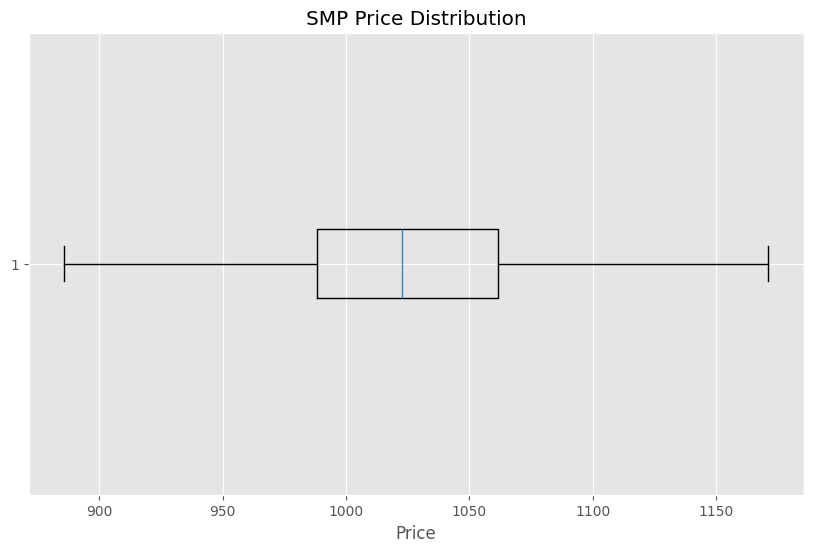

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['12'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

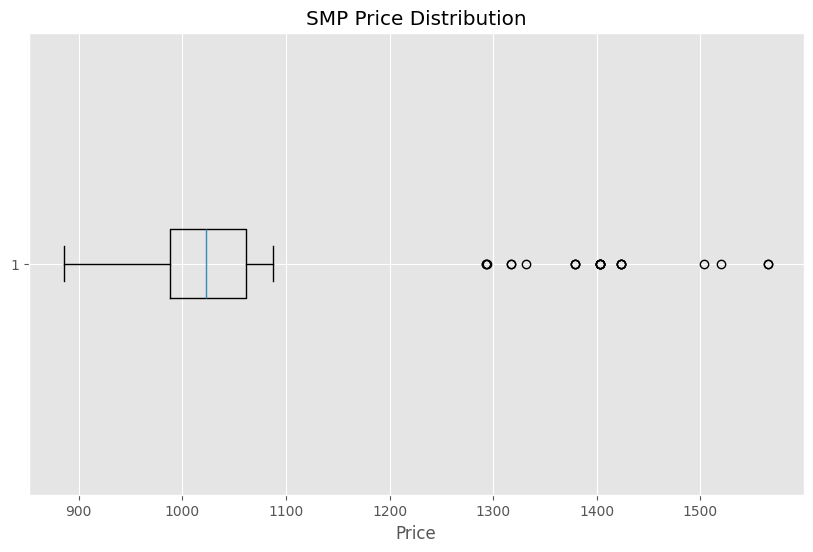

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['13'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [11]:
IQR_Price2 = df["13"].quantile(0.75) - df["13"].quantile(0.25)
lower_Price2_limit = df["13"].quantile(0.25) - (IQR_Price2 * 1.5)
upper_Price2_limit = df["13"].quantile(0.75) + (IQR_Price2 * 1.5)
print(lower_Price2_limit)
print(upper_Price2_limit)
df["13"]= np.where(df["13"] > upper_Price2_limit , upper_Price2_limit ,#cau
                      np.where(df["13"] < lower_Price2_limit , lower_Price2_limit , df["13"]))

878.75
1171.15


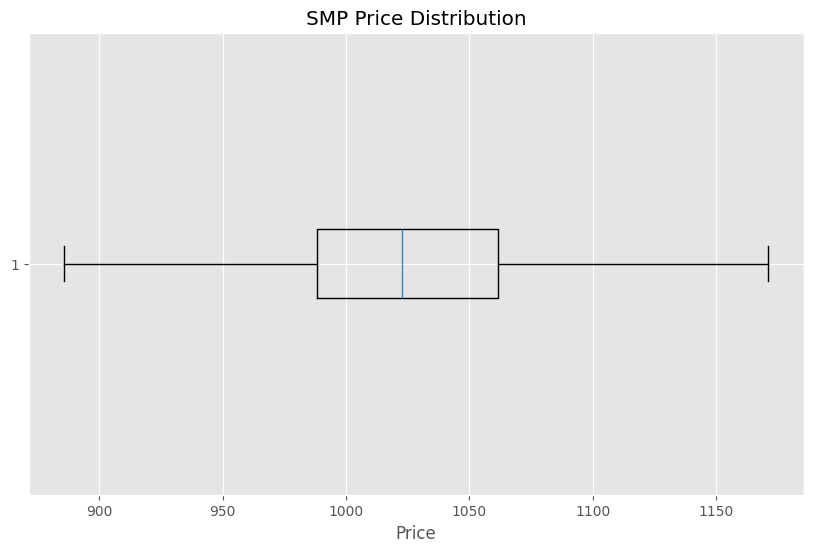

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['13'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [13]:
MyColumn = df['12']

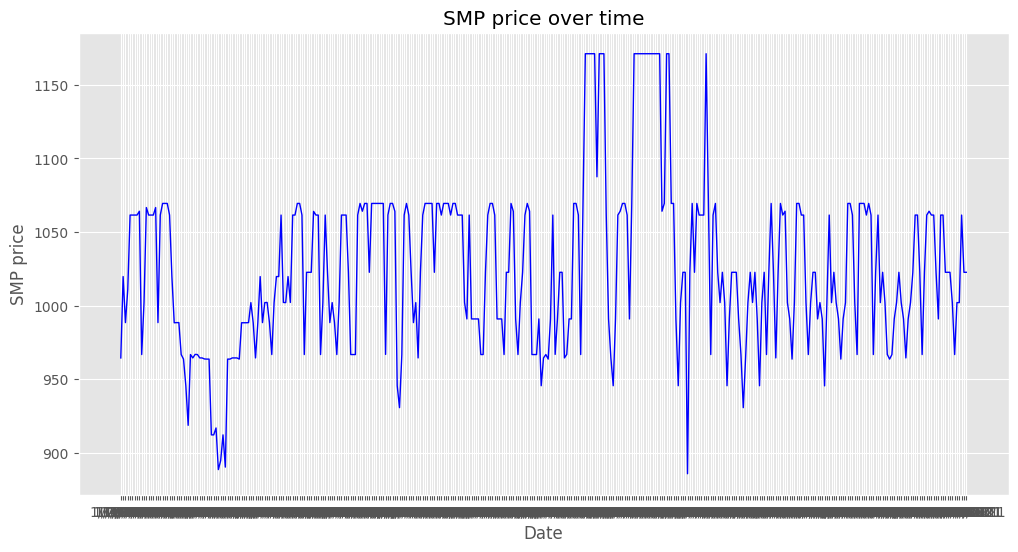

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], MyColumn, color='blue', linewidth=1)
plt.title('SMP price over time')
plt.xlabel('Date')
plt.ylabel('SMP price')
plt.grid(True)
plt.show()

In [15]:
MyOtherColumn = df['13']

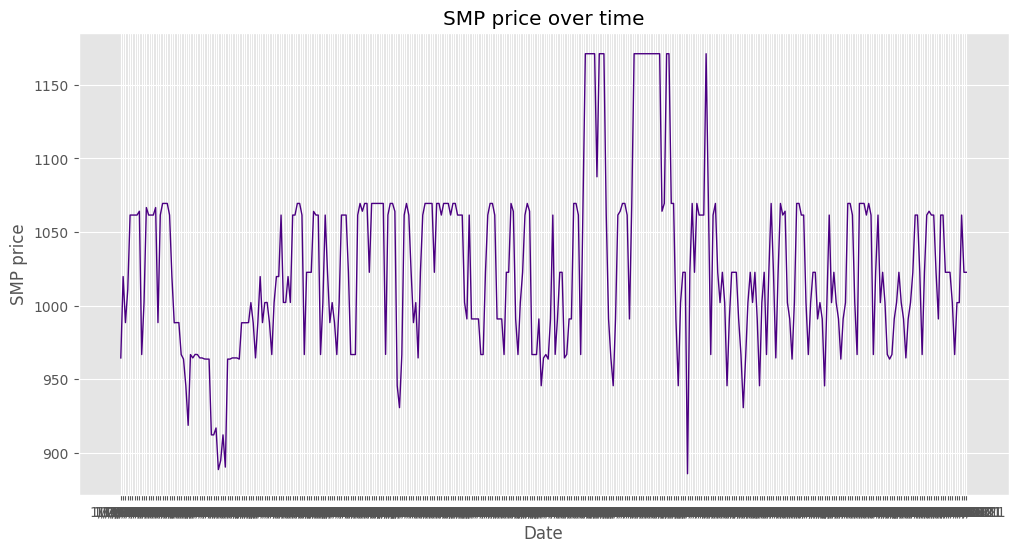

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], MyOtherColumn, color='indigo', linewidth=1)
plt.title('SMP price over time')
plt.xlabel('Date')
plt.ylabel('SMP price')
plt.grid(True)
plt.show()

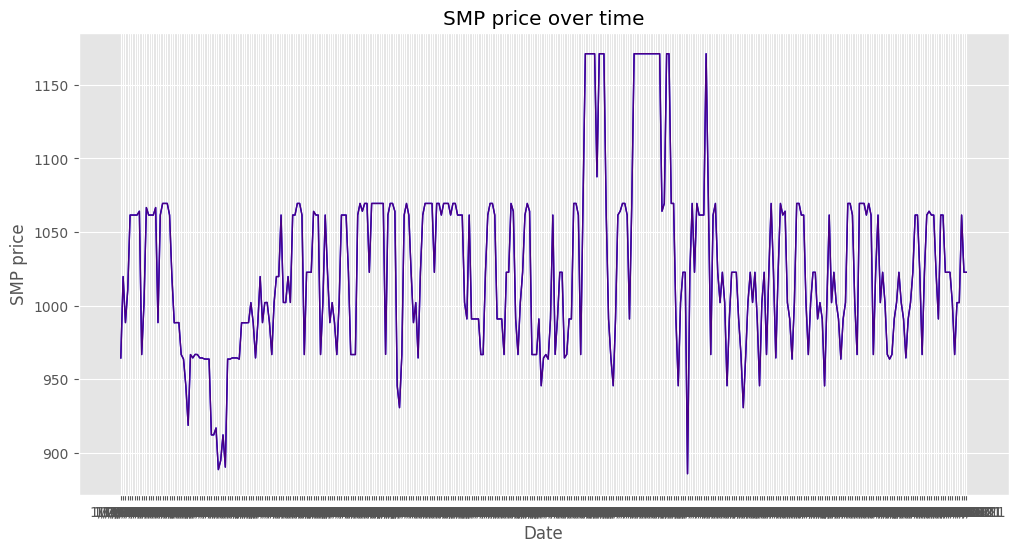

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], MyColumn, color='blue', linewidth=1)
plt.plot(df['Ngày'], MyOtherColumn, color='indigo', linewidth=1)
plt.title('SMP price over time')
plt.xlabel('Date')
plt.ylabel('SMP price')
plt.grid(True)
plt.show()

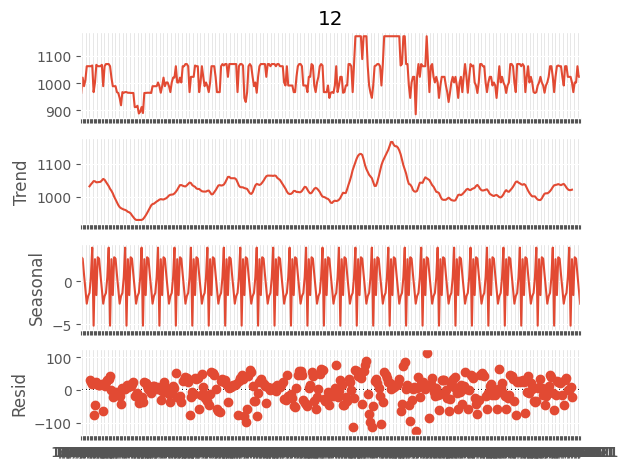

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Ngày', inplace=True)
decomposition = seasonal_decompose(df['12'], model='additive', period=12)
decomposition.plot()
plt.show()

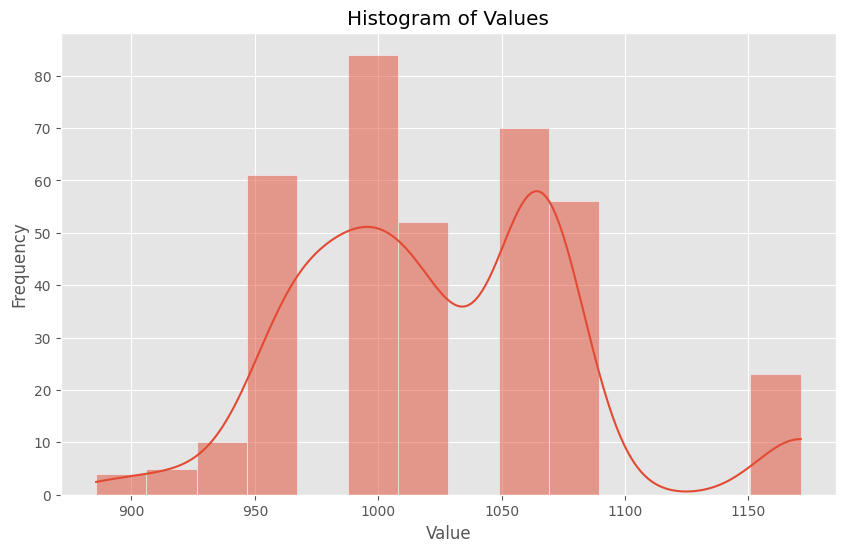

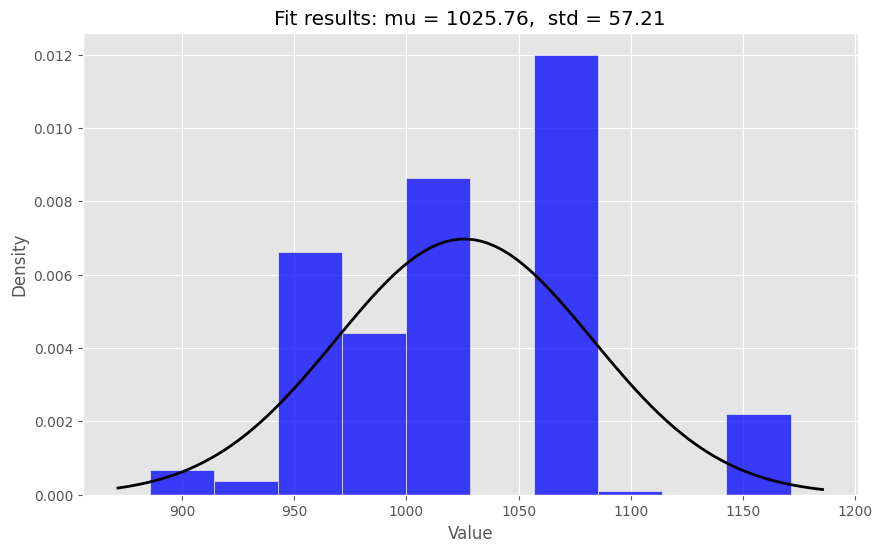

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['12'], kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mu, std = norm.fit(df['12'])

plt.figure(figsize=(10, 6))
sns.histplot(df['12'], bins=10, kde=False, color='blue', stat='density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

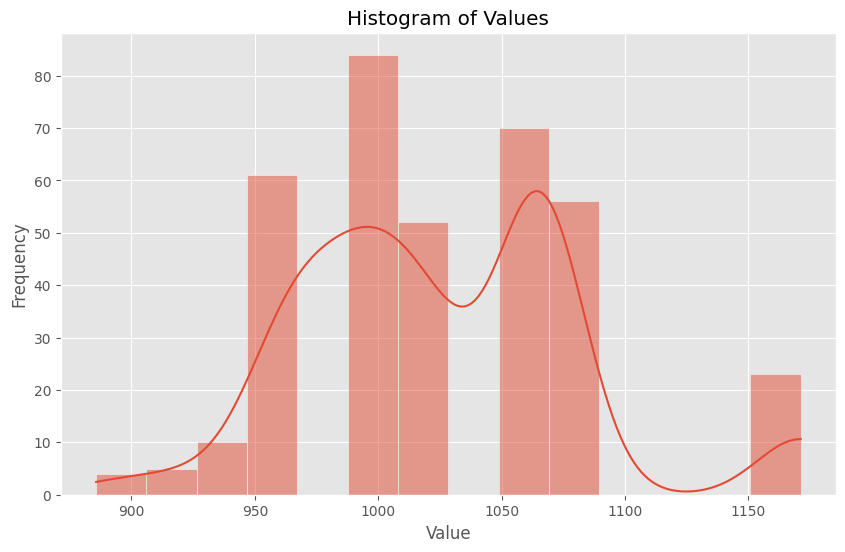

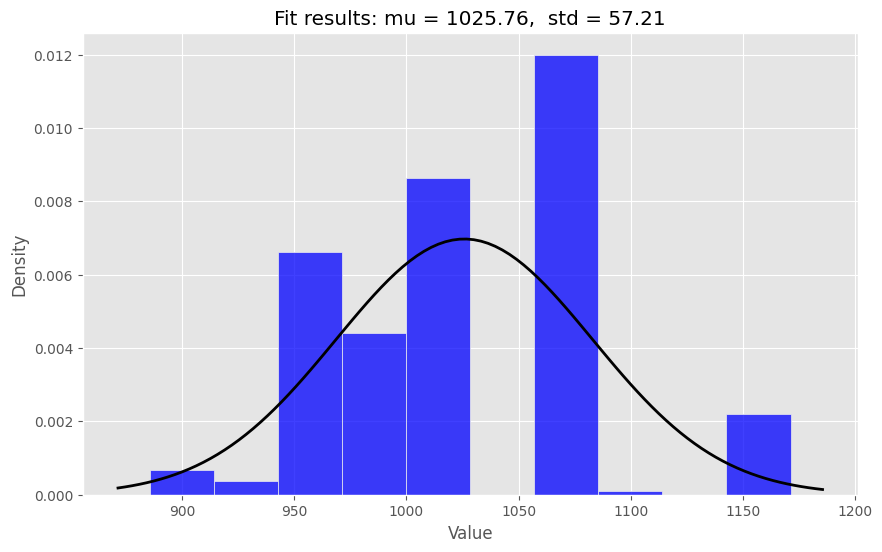

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['13'], kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mu, std = norm.fit(df['13'])

# Plot the histogram with the fitted Gaussian distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['13'], bins=10, kde=False, color='blue', stat='density')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()